<a href="https://colab.research.google.com/github/GauravJKshirsagar/DSF/blob/master/SVM_hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [0]:
from google.colab import files
uploaded = files.upload()


Saving sign-language-mnist.zip to sign-language-mnist.zip


In [0]:
!ls




sample_data  sign-language-mnist.zip


In [0]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [0]:
df=pd.read_csv('sign_mnist_train.csv')
dfpix=df.iloc[:,1:785]
dflable=df.iloc[:,0]

In [0]:
dfpix.shape
dflable.shape
dflable[0]
dfpix

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,194,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,171,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,174,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


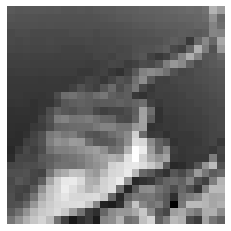

6

In [0]:
import matplotlib as mpl
dfpix.iloc[1].values
some_gesture=dfpix.iloc[1].values


some_gesture_image=some_gesture.reshape(28,28)

plt.imshow(some_gesture_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

dflable.iloc[1]

In [0]:

x_train = df.iloc[0:27000, 1:785].values
y_train = df.iloc[0:27000, 0].values

x_test = df.iloc[27000:27455, 1:785].values
y_test = df.iloc[27000:27455,0].values

In [0]:
from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


df_test = pd.read_csv('sign_mnist_test.csv')

x_test1 = df_test.iloc[0:7172, 1:785].values
y_test1 = df_test.iloc[0:7172,0].values
y_pred1 = classifier.predict(x_test1)
accuracy_score(y_test1,y_pred1)


0.8413273842721696

In [0]:

acc = accuracy_score(y_test1,y_pred1)
f1 = f1_score(y_test1,y_pred1,average='micro')
cm = confusion_matrix(y_test1,y_pred1)

print(cm)
print(f1)
print(acc)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 321   8   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 198   0   0   0   0   0   0  47   0
    0  29   0  16